In [5]:
import tensorflow as tf

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Flatten, Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os 
import numpy as np
import matplotlib.pyplot as plt

In [8]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 46s 1us/step


In [11]:
PATH

'C:\\Users\\preetham\\.keras\\datasets\\cats_and_dogs_filtered'

In [12]:
train_dir = os.path.join(PATH,'train')
validation_dir = os.path.join(PATH,'validation')

In [13]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [14]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr+num_dogs_tr
total_val = num_cats_val+num_dogs_val

In [15]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [16]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [17]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator= ImageDataGenerator(rescale = 1./255)

In [18]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                          directory = train_dir,
                                                          shuffle = True,
                                                          target_size = (IMG_HEIGHT,IMG_WIDTH),
                                                          class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [22]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size = batch_size,
                                                             directory = validation_dir,
                                                             target_size = (IMG_HEIGHT,IMG_WIDTH),
                                                             class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [23]:
sample_training_images,_ = next(train_data_gen)

In [28]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,5,figsize = (20,20))
    axes = axes.flatten()
    
    for img,ax in zip(images_arr,axes):
        plt.grid(False)
        ax.imshow(img)
        ax.axis = ('off')
    plt.tight_layout()
    plt.show()

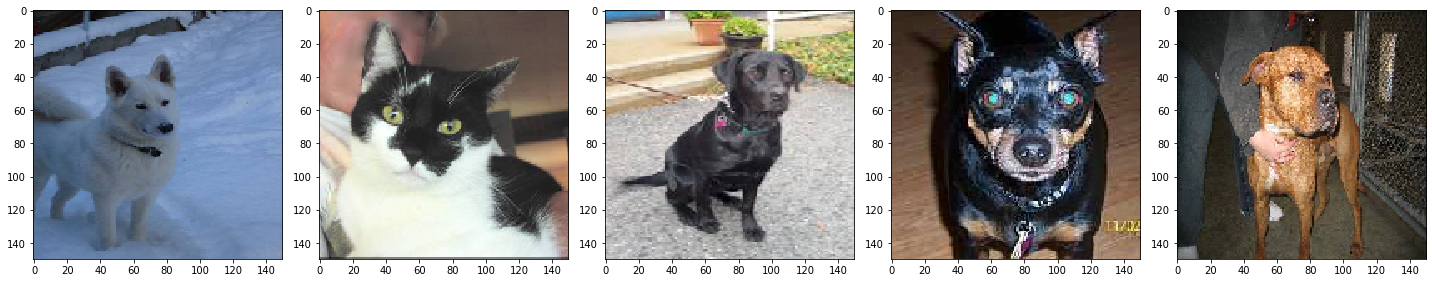

In [29]:
plotImages(sample_training_images[:5])

In [32]:
model = Sequential([
    Conv2D(16,3,padding = 'same',activation="relu",input_shape = (IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(32,3,padding = 'same',activation = 'relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding = 'same',activation = "relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation = "relu"),
    Dense(1)
])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [35]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
metrics = ['accuracy'])

In [36]:
history = model.fit_generator(
train_data_gen,
steps_per_epoch = total_train//batch_size,
epochs = epochs,
validation_data = val_data_gen,
validation_steps = total_val//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 58s 4s/step - loss: 0.8055 - accuracy: 0.5059 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 2/15
15/15 [==============================] - 35s 2s/step - loss: 0.6871 - accuracy: 0.5005 - val_loss: 0.6805 - val_accuracy: 0.5022
Epoch 3/15
15/15 [==============================] - 35s 2s/step - loss: 0.6637 - accuracy: 0.5294 - val_loss: 0.6579 - val_accuracy: 0.5312
Epoch 4/15
15/15 [==============================] - 36s 2s/step - loss: 0.6214 - accuracy: 0.6271 - val_loss: 0.6144 - val_accuracy: 0.6217
Epoch 5/15
15/15 [==============================] - 36s 2s/step - loss: 0.5831 - accuracy: 0.6624 - val_loss: 0.6111 - val_accuracy: 0.7031
Epoch 6/15
15/15 [==============================] - 37s 2s/step - loss: 0.5182 - accuracy: 0.7190 - val_loss: 0.5561 - val_accuracy: 0.7277
Epoch 7/15
15/15 [==============================] - 38s 3s/step - loss: 0.4800 - acc

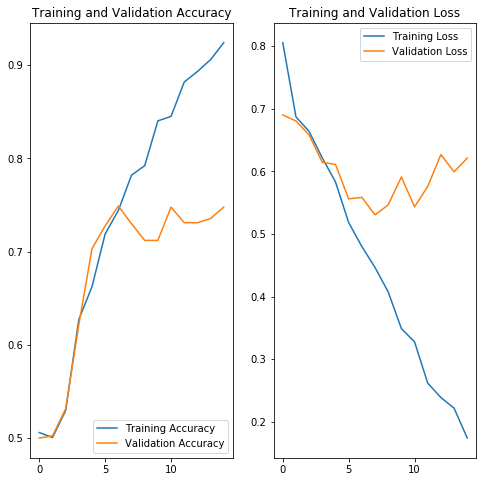

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [68]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [69]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

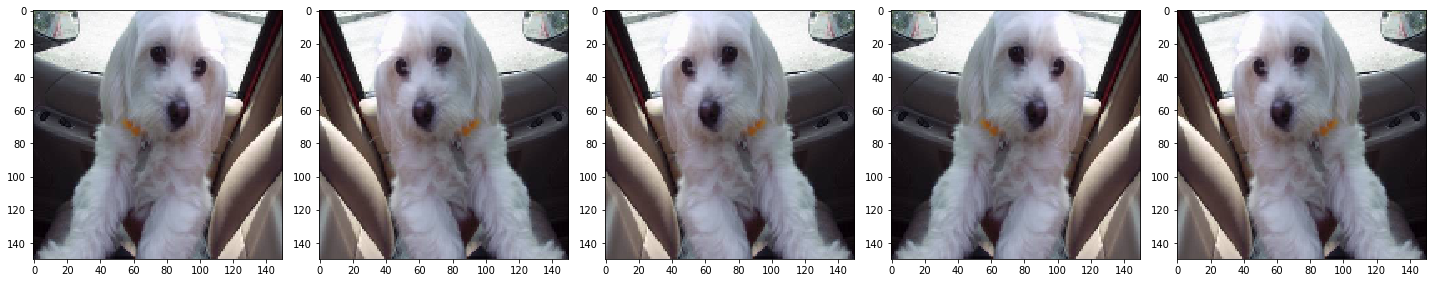

In [71]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

In [72]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [73]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


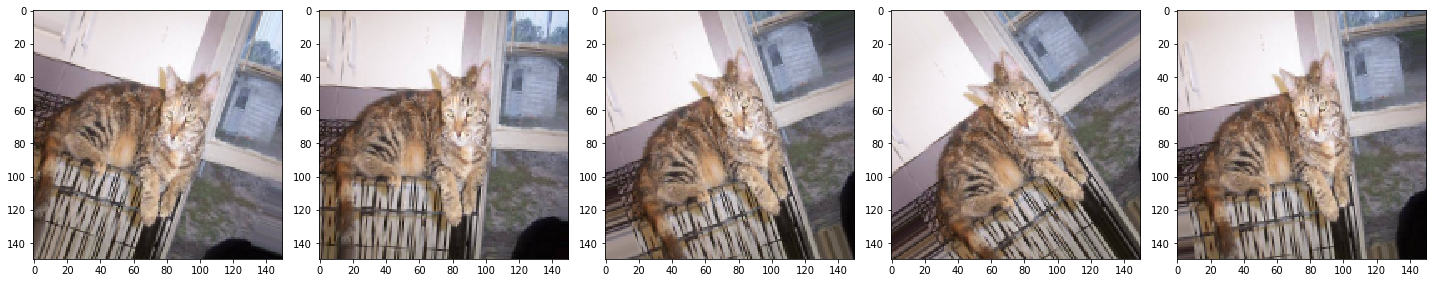

In [74]:
plotImages(augmented_images)

In [75]:
image_gen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.5)


In [76]:
train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (IMG_HEIGHT,IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [77]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

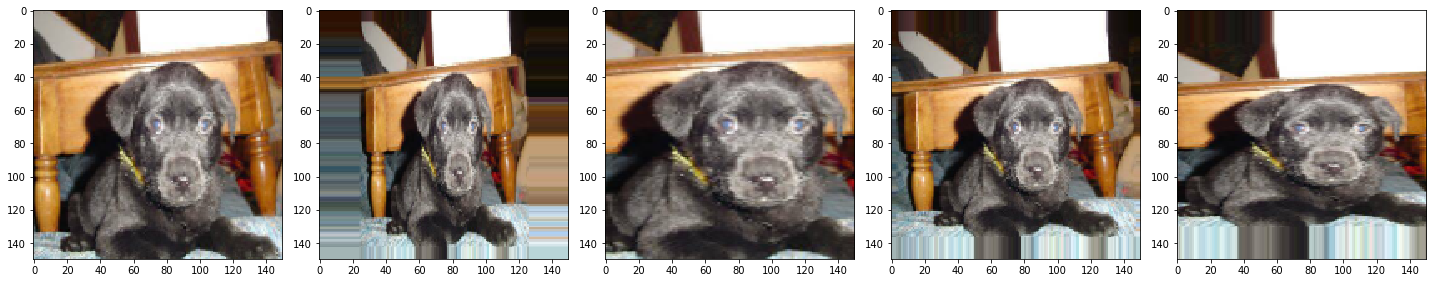

In [78]:
plotImages(augmented_images)

In [79]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [80]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


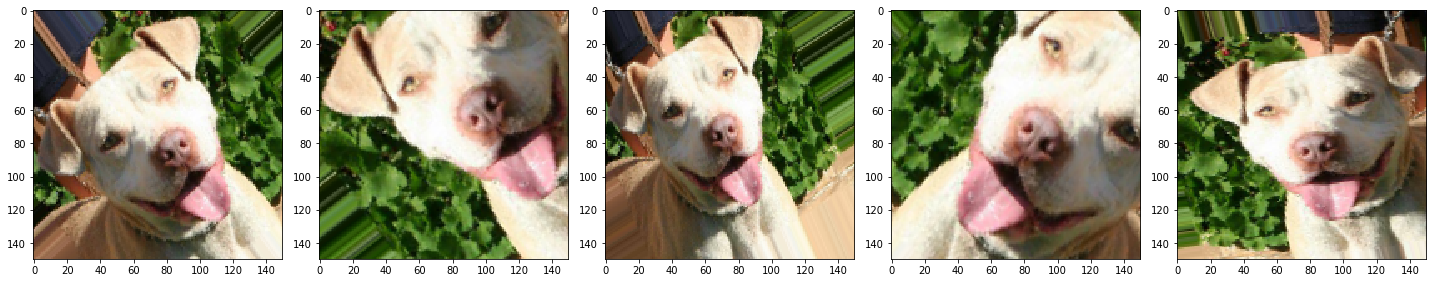

In [81]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [82]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [83]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [84]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [85]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [86]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 76s 5s/step - loss: 1.0937 - accuracy: 0.5240 - val_loss: 0.6928 - val_accuracy: 0.5078
Epoch 2/15
15/15 [==============================] - 44s 3s/step - loss: 0.6922 - accuracy: 0.4995 - val_loss: 0.6871 - val_accuracy: 0.5078
Epoch 3/15
15/15 [==============================] - 48s 3s/step - loss: 0.6869 - accuracy: 0.5027 - val_loss: 0.6753 - val_accuracy: 0.5413
Epoch 4/15
15/15 [==============================] - 60s 4s/step - loss: 0.6772 - accuracy: 0.5390 - val_loss: 0.6528 - val_accuracy: 0.5938
Epoch 5/15
15/15 [==============================] - 54s 4s/step - loss: 0.6671 - accuracy: 0.5604 - val_loss: 0.6946 - val_accuracy: 0.5915
Epoch 6/15
15/15 [==============================] - 65s 4s/step - loss: 0.6611 - accuracy: 0.5732 - val_loss: 0.6858 - val_accuracy: 0.5960
Epoch 7/15
15/15 [==============================] - 58s 4s/step - loss: 0.6550 - accuracy: 0.5844 - val_loss: 0.6429 - val_accuracy: 0.6205
Epoch 8/15
15/15 [==

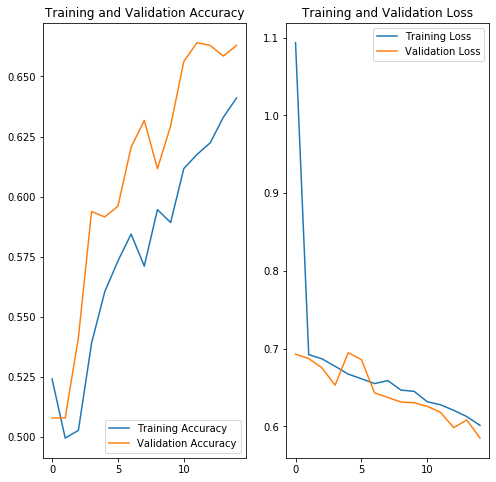

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()